In [20]:
#环境质量分类实战任务：

#1基于data_class_raw.csv数据，根据高斯分布概率密度函数，寻找异常点并剔除
#基于data_class_processed.csv数据，进行PCA处理，确定重要数据维度及成分
#完成数据分离，数据分离参数：random_state=4, test_size=0.4


In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

data = pd.read_csv('data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


<Figure size 640x480 with 0 Axes>

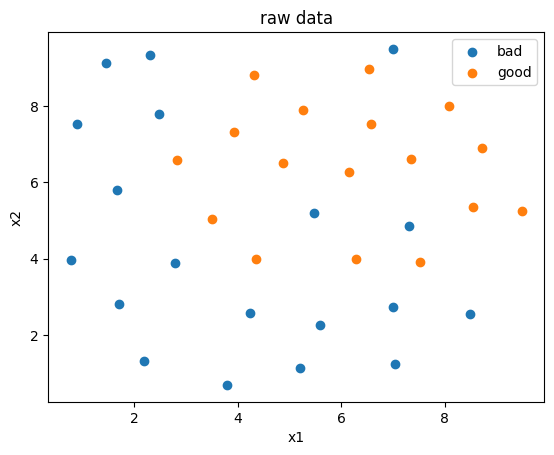

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
fig0 = plt.figure()
y = data['y']
x = data.drop('y', axis=1)
fig0 = plt.figure()
bad = plt.scatter(x['x1'][y==0], x['x2'][y==0])
good = plt.scatter(x['x1'][y==1], x['x2'][y==1])
plt.legend([bad, good], ['bad', 'good'])
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [23]:
#anomay detection
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(x[y==0])
y_predict_bad = ad_model.predict(x[y==0])
y_predict_good = ad_model.predict(x[y==1])
print(y_predict_bad)
print(y_predict_good)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


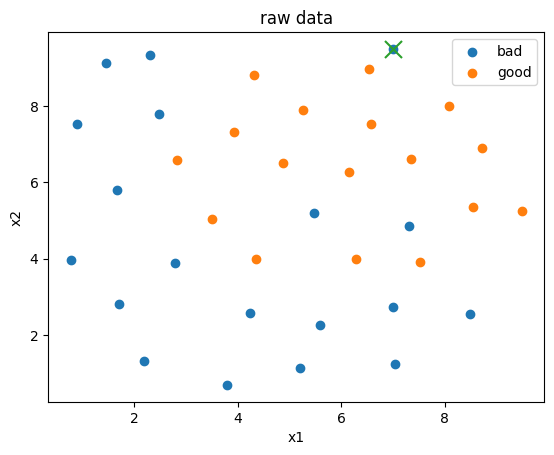

In [24]:
fig1 = plt.figure()
bad = plt.scatter(x['x1'][y==0], x['x2'][y==0])
good = plt.scatter(x['x1'][y==1], x['x2'][y==1])
plt.scatter(x['x1'][y==0][y_predict_bad == -1], x['x2'][y==0][y_predict_bad == -1],marker='x',s=150)
plt.legend([bad, good,], ['bad', 'good'])
plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [25]:
#remove uncommon data
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

data = pd.read_csv('data_class_processed.csv')
y = data['y']
x = data.drop('y', axis=1)
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


[0.5369408 0.4630592]


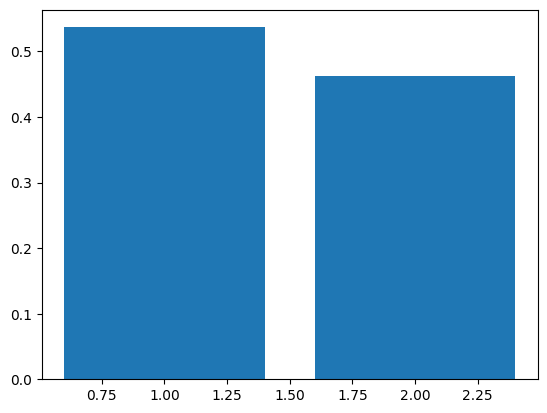

In [26]:
#pca operate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_norm = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
pca.fit(x_norm)
x_pca = pca.transform(x_norm)
print(pca.explained_variance_ratio_)
fig4 = plt.figure()
plt.bar([1,2],pca.explained_variance_ratio_)
plt.show()

In [27]:

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=4, test_size=0.4)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(21, 2) (21,) (14, 2) (14,)


In [28]:
#建立KNN模型完成分类，n_neighbors取10，计算分类准确率，可视化分类边界
#计算测试数据集对应的混淆矩阵，计算准确率、召回率、特异度、精确率、F1分数
#尝试不同的n_neighbors（1-20），计算其在训练数据集、测试数据集上的准确率并作图

In [29]:
#build knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_train, accuracy_test)

0.9047619047619048 0.6428571428571429
